In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [2]:
hotel = pd.read_csv('/Users/mahinbindra/Downloads/Hotel Reservations 2.csv')

In [3]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
hotel.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [6]:
hotel.groupby('booking_status').count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
booking_status,,,,,,,,,,,,,,,,,,
Canceled,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885
Not_Canceled,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390


In [7]:
hotel['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [8]:
hotel.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

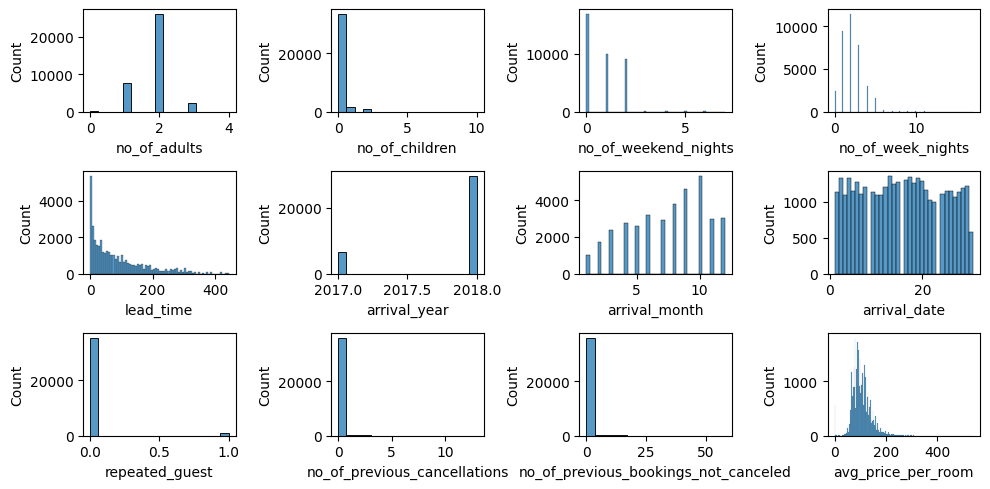

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3,4, figsize = (10,5))
plt1 = sns.histplot(hotel['no_of_adults'], ax = axs[0,0])
plt2 = sns.histplot(hotel['no_of_children'], ax = axs[0,1])
plt3 = sns.histplot(hotel['no_of_weekend_nights'], ax = axs[0,2])
plt4 = sns.histplot(hotel['no_of_week_nights'], ax = axs[0,3])
plt5 = sns.histplot(hotel['lead_time'], ax = axs[1,0])
plt6 = sns.histplot(hotel['arrival_year'], ax = axs[1,1])
plt7 = sns.histplot(hotel['arrival_month'], ax = axs[1,2])
plt8 = sns.histplot(hotel['arrival_date'], ax = axs[1,3])
plt9 = sns.histplot(hotel['repeated_guest'], ax = axs[2,0])
plt10 = sns.histplot(hotel['no_of_previous_cancellations'], ax = axs[2,1])
plt11 = sns.histplot(hotel['no_of_previous_bookings_not_canceled'], ax = axs[2,2])
plt12 = sns.histplot(hotel['avg_price_per_room'], ax = axs[2,3])
plt.tight_layout()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(y = 'Age', x = 'Segmentation', data = df, ax = ax1)
sns.boxplot(y = 'Work_Experience', x = 'Segmentation', data = df, ax = ax2)
sns.boxplot(y = 'Family_Size', x = 'Segmentation', data = df, ax = ax3)

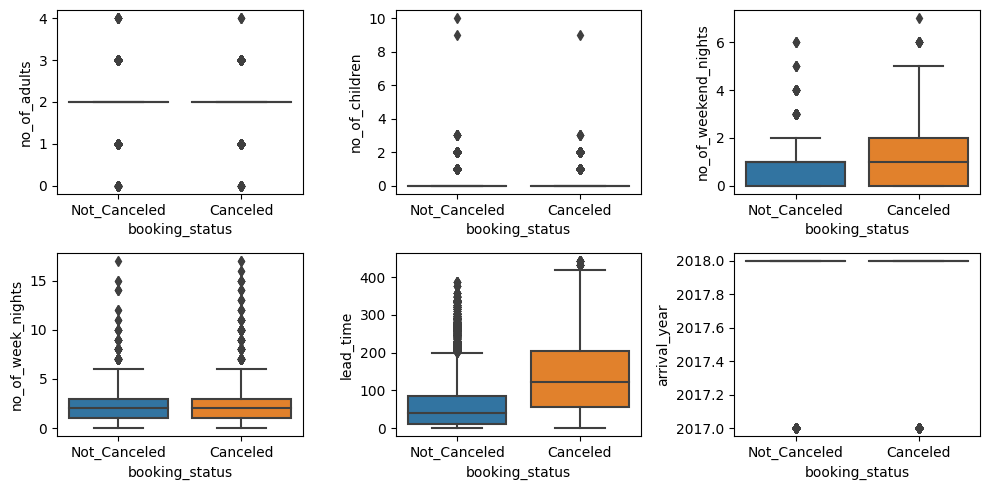

In [11]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(y = 'no_of_adults', x = 'booking_status', data = hotel, ax = axs[0,0])
plt2 = sns.boxplot(y ='no_of_children', x = 'booking_status', data = hotel, ax = axs[0,1])
plt3 = sns.boxplot(y ='no_of_weekend_nights', x = 'booking_status', data = hotel, ax = axs[0,2])
plt4 = sns.boxplot(y ='no_of_week_nights', x = 'booking_status', data = hotel, ax = axs[1,0])
plt5 = sns.boxplot(y ='lead_time', x = 'booking_status', data = hotel,  ax = axs[1,1])
plt6 = sns.boxplot(y ='arrival_year', x = 'booking_status', data = hotel,  ax = axs[1,2])
plt.tight_layout()

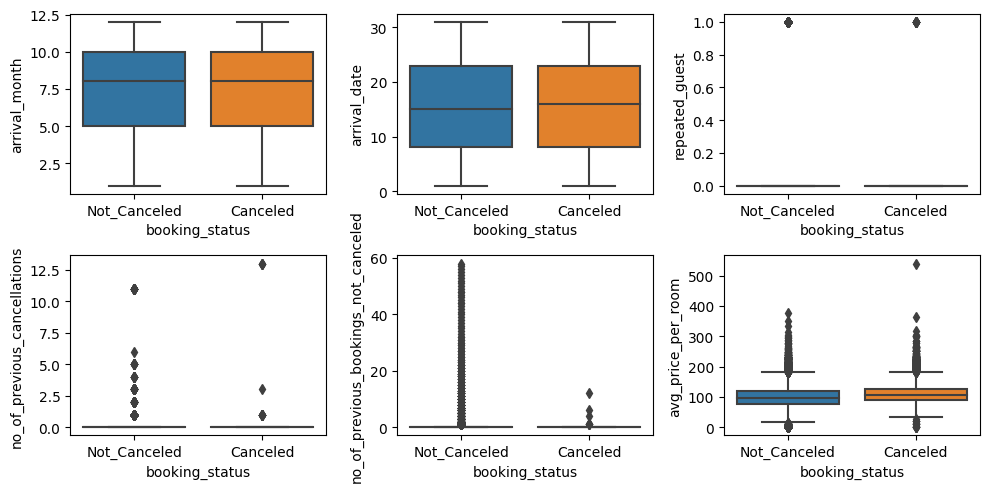

In [12]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt7 = sns.boxplot(y = 'arrival_month', x = 'booking_status', data = hotel, ax = axs[0,0])
plt8 = sns.boxplot(y = 'arrival_date', x = 'booking_status', data = hotel, ax = axs[0,1])
plt9 = sns.boxplot(y ='repeated_guest', x = 'booking_status', data = hotel,  ax = axs[0,2])
plt10 = sns.boxplot(y ='no_of_previous_cancellations', x = 'booking_status', data = hotel,  ax = axs[1,0])
plt11 = sns.boxplot(y ='no_of_previous_bookings_not_canceled', x = 'booking_status', data = hotel, ax = axs[1,1])
plt12 = sns.boxplot(y ='avg_price_per_room', x = 'booking_status', data = hotel,  ax = axs[1,2])
plt.tight_layout()

In [13]:
hotel_2 = hotel.copy()

In [15]:
hotel_2.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [16]:
hotel_2.groupby(['type_of_meal_plan', 'booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
type_of_meal_plan,,
Meal Plan 1,8679,19156
Meal Plan 2,1506,1799
Meal Plan 3,1,4
Not Selected,1699,3431


In [17]:
hotel_2.groupby(['required_car_parking_space', 'booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
required_car_parking_space,,
0,11771,23380
1,114,1010


In [18]:
hotel_2.groupby(['room_type_reserved', 'booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
room_type_reserved,,
Room_Type 1,9072,19058
Room_Type 2,228,464
Room_Type 3,2,5
Room_Type 4,2069,3988
Room_Type 5,72,193
Room_Type 6,406,560
Room_Type 7,36,122


In [19]:
hotel_2.groupby(['market_segment_type', 'booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
market_segment_type,,
Aviation,37.0,88.0
Complementary,NaN,391.0
Corporate,220.0,1797.0
Offline,3153.0,7375.0
Online,8475.0,14739.0


In [20]:
hotel_2['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [21]:
hotel_2[hotel_2['booking_status']=='Not_Canceled'].describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,24390,24390.000000,24390.000000,24390.000000,24390.000000,24390,24390.000000,24390,24390.000000,24390.000000,24390.000000,24390.000000,24390,24390.000000,24390.000000,24390.000000,24390.000000,24390.000000,24390
unique,24390,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,1
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,19156,NaN,19058,NaN,NaN,NaN,NaN,14739,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.813489,0.095982,0.773309,2.112710,NaN,0.041410,NaN,58.927224,2017.772325,7.447724,15.532144,NaN,0.037474,0.032021,0.227101,99.931412,0.758549,NaN
std,NaN,0.530993,0.382288,0.843428,1.309173,NaN,0.199242,NaN,64.028714,0.419340,3.252560,8.718617,NaN,0.189925,0.415967,2.133507,35.872154,0.836532,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,10.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,77.860000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,39.000000,2018.000000,8.000000,15.000000,NaN,0.000000,0.000000,0.000000,95.000000,1.000000,NaN
75%,NaN,2.000000,0.000000,1.000000,3.000000,NaN,0.000000,NaN,86.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,119.100000,1.000000,NaN


In [22]:
hotel_2[hotel_2['booking_status']=='Canceled'].describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,11885,11885.000000,11885.000000,11885.000000,11885.000000,11885,11885.000000,11885,11885.000000,11885.000000,11885.000000,11885.000000,11885,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885
unique,11885,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1
top,INN00003,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Canceled
freq,1,NaN,NaN,NaN,NaN,8679,NaN,9072,NaN,NaN,NaN,NaN,8475,NaN,NaN,NaN,NaN,NaN,11885
mean,NaN,1.909550,0.124358,0.887505,2.392259,NaN,0.009592,NaN,139.215482,2017.919142,7.374253,15.730080,NaN,0.001346,0.005553,0.002188,110.589966,0.334623,NaN
std,NaN,0.486243,0.440903,0.919267,1.583088,NaN,0.097472,NaN,98.947731,0.272629,2.655423,8.783946,NaN,0.036668,0.241941,0.129710,32.264394,0.574345,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,55.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,89.270000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,122.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,108.000000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,205.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,126.360000,1.000000,NaN


In [ ]:
gender = pd.get_dummies(df['Gender'], dtype=int)
gender